# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Read Dataset

In [3]:
train = pd.read_csv("Mobile Price Classification_train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

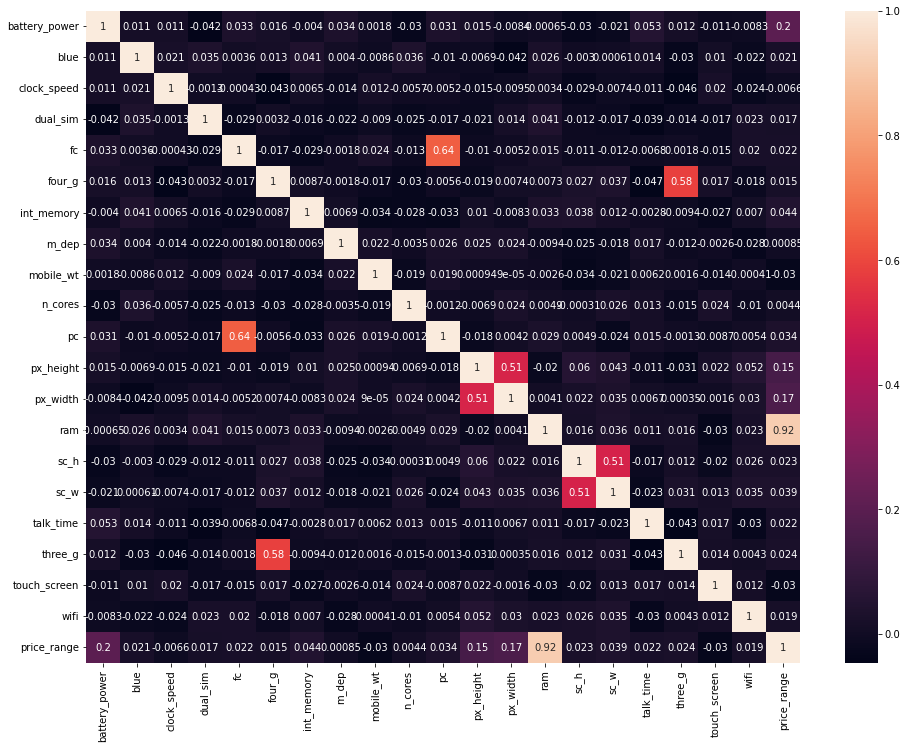

In [6]:
fig, axes = plt.subplots(1,1, figsize=(16, 12))
sns.heatmap(train.corr(), annot=True)

In [7]:
X = train.drop(['price_range'], axis=1)
y = train.price_range

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Selection

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

columns_selected = [0] * len(X_train.columns)

for t, r in kfold.split(X_train.values, y_train.values):
    
    X_train_inner, X_test_inner = X_train.values[t], X_train.values[r]
    y_train_inner, y_test_inner = y_train.values[t], y_train.values[r]
    
    lsvr = Lasso().fit(X=X_train_inner, y=y_train_inner)
    
    model = SelectFromModel(lsvr, prefit=True)
    
    columns_selected += np.where(model.get_support(), 1, 0)

In [10]:
X_train = X_train.loc[:, columns_selected > 0]
X_test = X_test.loc[:, columns_selected > 0]

# Feature Scaling

In [11]:
scale_features = [False] * len(X_train.columns)

for index, column in enumerate(X_train.columns):
    if len(X_train[column].value_counts().index) > 2:
        scale_features[index] = True

In [12]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(X_train.loc[:, scale_features])
scaler_y.fit(y_train.values.reshape(-1,1))

X_train.loc[:, scale_features] = scaler_X.transform(X_train.loc[:, scale_features])
y_train = scaler_y.transform(y_train.values.reshape(-1,1))

In [13]:
X_test.loc[:, scale_features] = scaler_X.transform(X_test.loc[:, scale_features])
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

# Model Training

In [14]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=32)

params = {'bootstrap': [True, False],
 'max_depth': [10, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 10],
 'n_estimators': [200, 2000]}

model_1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, cv=kfold, verbose=3)

In [15]:
model_1.fit(X_train.values, y_train.ravel())

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.947 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.931 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.924 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.942 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.947 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.947 total time=   4.0s
[CV 2/5] END bootst

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.941 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.936 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.940 total time=   2.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.919 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.929 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.944 total time=   2.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_sample

[CV 3/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.922 total time=   3.8s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.940 total time=   4.0s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.946 total time=   4.0s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.945 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.924 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.921 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=auto, min_sam

[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.916 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.891 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.894 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.902 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.916 total time=   5.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_

[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.943 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.940 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.942 total time=   2.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.919 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.931 total time=   2.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.943 total time=   2.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min

[CV 2/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.884 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.887 total time=   4.4s
[CV 4/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.903 total time=   4.8s
[CV 5/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.915 total time=   4.7s
[CV 1/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.919 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=100, max_features=auto, 

[CV 5/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.941 total time=   2.8s


GridSearchCV(cv=KFold(n_splits=5, random_state=32, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 2000]},
             verbose=3)

# Model Evaluation

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [17]:
mean_absolute_error(y_test, model_1.predict(X_test))

0.15020680690907445

In [18]:
mean_squared_error(y_test, model_1.predict(X_test))

0.05202925858448707

In [19]:
r2_score(y_test, model_1.predict(X_test))

0.9490834595980165

# Model Prediction

In [20]:
X_pred = pd.read_csv("Mobile Price Classification_test.csv")

In [21]:
ids = X_pred.id

In [22]:
X_pred.drop(['id'], axis=1, inplace=True)

In [23]:
X_pred = X_pred.loc[:, columns_selected > 0]

In [24]:
X_pred.loc[:, scale_features] = scaler_X.transform(X_pred.loc[:, scale_features])

In [29]:
result = pd.DataFrame({'id': ids, 'price_range': scaler_y.inverse_transform(model_1.predict(X_pred).reshape(-1, 1)).flatten()})